In [122]:
import pandas            as pd
import numpy             as np
import datetime          as dt
import matplotlib.pyplot as plt
import seaborn           as sns

from unidecode import unidecode

In [123]:
ipos = pd.read_csv('data/ofertas_publicas_e_ipos.csv')
ipos.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,DADOS DA COMPANHIA,NaN,NaN,NaN,INFORMAÇÕES DA OFERTA,NaN,NaN,NaN,NaN,...,NaN,PARTICIPAÇÃO DOS INVESTIDORES (%) ³,NaN,NaN,NaN,NaN,VOLUME TOTAL (R$),NaN,NaN,NaN
1,NaN,NOME DE PREGÃO,LISTAGEM NA OFERTA,CLASSIFICAÇÃO SETORIAL (SEGMENTO),COORDENADOR LÍDER,CLASSIFICAÇÃO,TIPO,FIXAÇÃO DE PREÇO,PREÇO POR AÇÃO / UNIT / BDR (LÇTO.)4,INÍCIO DE NEGOCIAÇÃO,...,VOLUME TOTAL (R$),VAREJO,INSTITUCIONAL,ESTRANGEIROS,OUTROS,NaN,ANO,IPO,FOLLOW-ON,TOTAL
2,NaN,CCR RODOVIAS,NM,Exploração de Rodovias,UBS,FOLLOW-ON,ICVM 400,4/26/2004,"R$ 23,50",27/04/04,...,375.000.005,7%,18%,75%,1%,NaN,2004,4.487.065.024,4.317.579.322,8.804.644.346
3,NaN,NATURA,NM,Prod. de Uso Pessoal,UBS,IPO,ICVM 400,5/24/2004,"R$ 36,50",26/05/04,...,768.120.637,14%,15%,67%,4%,NaN,2005,5.447.335.660,8.488.868.795,13.936.204.455
4,NaN,GOL,N2,Transporte Aéreo,Morgan Stanley,IPO,ICVM 400,6/23/2004,"R$ 26,57",24/06/04,...,878.138.500,10%,13%,75%,1%,NaN,2006,15.373.613.634,15.062.683.258,30.436.296.892


In [124]:
ipos.drop(ipos.columns[0], axis=1,inplace=True)
ipos.drop(ipos.columns[-5:], axis=1,inplace=True)
ipos.columns = [unidecode(col_name.lower().replace(' ', '_')) for col_name in ipos.iloc[1]]
ipos.rename(columns = {'preco_por_acao_/_unit_/_bdr_(lcto.)4':'preco_por_acao',
                    'classificacao_setorial_(segmento)':'segmento'},
           inplace = True)
ipos.drop([0,1], inplace=True)
ipos.drop(ipos.tail(6).index, inplace=True)
ipos.head()

,nome_de_pregao,listagem_na_oferta,segmento,coordenador_lider,classificacao,tipo,fixacao_de_preco,preco_por_acao,inicio_de_negociacao,no_de_pessoas_fisicas,_no_total_de_investidores_,_volume_primaria_(r$)_,_volume_secundaria_(r$)_,volume_total_(r$),varejo,institucional,estrangeiros,outros
2,CCR RODOVIAS,NM,Exploração de Rodovias,UBS,FOLLOW-ON,ICVM 400,4/26/2004,"R$ 23,50",27/04/04,1.010,1.514,375.000.005,-,375.000.005,7%,18%,75%,1%
3,NATURA,NM,Prod. de Uso Pessoal,UBS,IPO,ICVM 400,5/24/2004,"R$ 36,50",26/05/04,4.376,5.460,-,768.120.637,768.120.637,14%,15%,67%,4%
4,GOL,N2,Transporte Aéreo,Morgan Stanley,IPO,ICVM 400,6/23/2004,"R$ 26,57",24/06/04,11.274,12.380,498.187.500,379.951.000,878.138.500,10%,13%,75%,1%
5,ALL AMER LAT,N2,Transporte Ferroviário,Pactual,IPO,ICVM 400,6/23/2004,"R$ 46,50",25/06/04,3.275,4.198,267.375.000,320.850.000,588.225.000,8%,20%,71%,1%
6,WEG,N1,"Motores, Compressores e Outros",Bradesco BBI,FOLLOW-ON,ICVM 400,9/3/2004,"R$ 7,20",06/09/04,5.130,5.708,-,319.384.800,319.384.800,30%,24%,41%,5%


In [125]:
ipos = ipos[ipos.classificacao == 'IPO']

In [126]:
ipos['inicio_de_negociacao'] = pd.to_datetime(ipos['inicio_de_negociacao'])

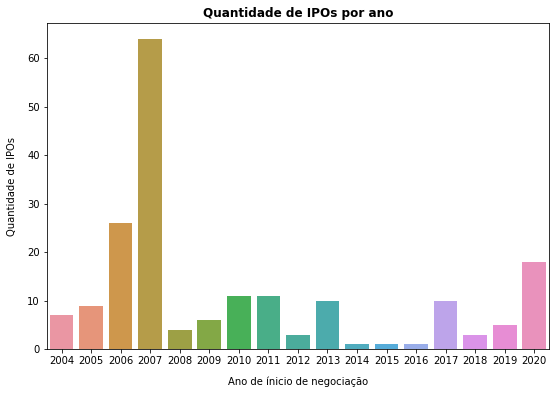

In [127]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(x=ipos.inicio_de_negociacao.dt.year , data=ipos)
ax = plt.title('Quantidade de IPOs por ano', fontsize = 12, fontweight = 'bold')
ax = plt.xlabel('Ano de ínicio de negociação', labelpad = 10, fontsize = 10)
ax = plt.ylabel('Quantidade de IPOs', labelpad = 10, fontsize = 10)

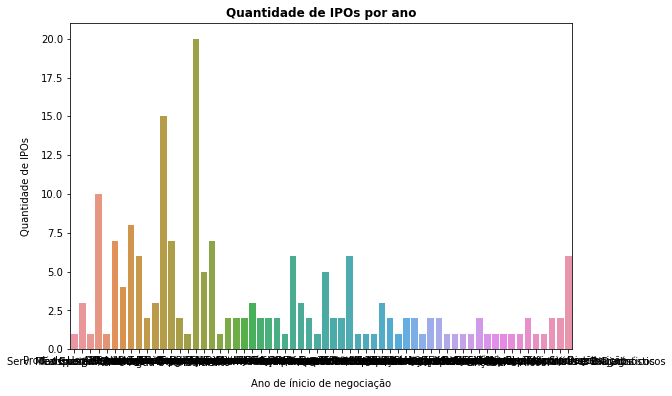

In [129]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='segmento' , data=ipos)
ax = plt.title('Quantidade de IPOs por ano', fontsize = 12, fontweight = 'bold')
ax = plt.xlabel('Ano de ínicio de negociação', labelpad = 10, fontsize = 10)
ax = plt.ylabel('Quantidade de IPOs', labelpad = 10, fontsize = 10)

In [230]:
from pandas import ExcelFile
xls = ExcelFile('data/Setorial.xlsx')
df = xls.parse(xls.sheet_names[0])

In [231]:
df.drop(df.head(5).index, inplace=True)

In [232]:
a = dict(zip(df.columns[:3], df.iloc[0][:3])) 
a.update(dict(zip(df.columns[-2:], df.iloc[1][-2:])).items())

In [233]:
df.rename(columns={'CLASSIFICAÇÃO SETORIAL DAS EMPRESAS NEGOCIADAS NA B3': 'setor_economico',
 'Unnamed: 1': 'subsetor',
 'Unnamed: 2': 'segmento',
 'Unnamed: 3': 'codigo',
 'Unnamed: 4': 'nivel_governanca'}, inplace = True)
df.drop(df.head(2).index, inplace=True)
df.drop(df.tail(18).index, inplace=True)

In [234]:
df = df[(df.segmento.isnull() == False) & (df.codigo.isnull() == True)]
#df.drop(df.columns[-2:], axis=1, inplace=True)

In [235]:
df[df.segmento == 'Exploração de Rodovias']

,setor_economico,subsetor,segmento,codigo,nivel_governanca
121,NaN,NaN,Exploração de Rodovias,NaN,NaN
